# Parsing the Pubmed Abstracts

In [1]:
import pubmed.utils as pb
import json
import re
from collections import defaultdict
from pprint import pprint
import string
# utf-8 support
import codecs
import nltk
# spit abstracts to sentences
from nltk.tokenize import sent_tokenize
import ast
import pickle

import pandas as pd
import numpy as np
import re

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lisabarcelo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

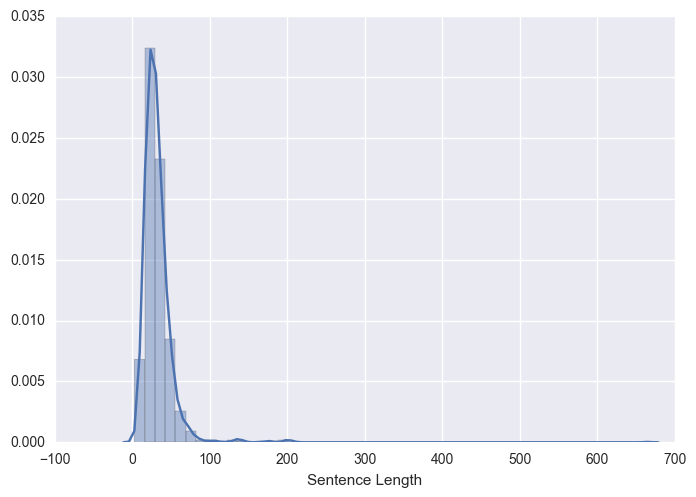

In [3]:
%matplotlib inline
import re 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

lengths_ = []


for item in open("/Users/lisabarcelo/Desktop/W266/food_drug_interaction/parsing/data/labeled_dataAll.tsv","r").readlines()[1::]:
    id_, label, label_num, drug, component, sentence = item.split("\t",5)
    words_ = [w for w in sentence.split(" ")]
    lengths_.append(len(words_))
    
sns.distplot(lengths_,axlabel="Sentence Length")

In [4]:
orig_dict = {}

i = 0
import re 
#for item in open("sent_files/glp_sent.tsv","r"):
for item in open("/Users/lisabarcelo/Desktop/W266/food_drug_interaction/parsing/data/labeled_dataAll.tsv","r").readlines()[1::]:
    #sent_id, sentiment, compound, sentence = item.split("\t",3)
    i += 1
    id_, label, label_num, drug, component, sentence = item.split("\t",5)
    sentence = re.sub(r'\([^)]*\)', '', sentence)
    sentence = sentence.replace(";"," ")
    sentence = sentence.replace('"',' ')
    #sentence = re.sub("\d+","",re.sub(r'[^\w\s]','',sentence))
    words_ = [w for w in sentence.split(" ")]
    if len(words_) >= 30:
        #print " ".join([w for w in words_][:30]),"."
        orig_dict['Sentence #'+str(i)] = label
    else:
        #print sentence.encode('utf-8')
        orig_dict['Sentence #'+str(i)] = label

In [5]:
len(orig_dict)

2471

#### Note: Parser could only handle ~1000 sentences at a time so I ran 3 times and collected three files that I later merged into one dictionary

In [65]:
%%writefile sent_files/for_SSA.py

import re 
for item in open("/Users/lisabarcelo/Desktop/W266/food_drug_interaction/parsing/data/labeled_dataAll.tsv","r").readlines()[2000::]:
    id_, label, label_num, drug, component, sentence = item.split("\t",5)
    sentence = re.sub(r'\([^)]*\)', '', sentence)
    sentence = sentence.replace(";"," ")
    sentence = sentence.replace('"',' ')
    sentence = re.sub("\d+","",re.sub(r'[^\w\s]','',sentence))
    words_ = [w for w in sentence.split(" ")]
    if len(words_) >= 30:
        print " ".join([w for w in words_][:30]),"."
    else:
        print sentence.encode('utf-8'),"."

Overwriting sent_files/for_SSA.py


In [66]:
!python2 sent_files/for_SSA.py > sent_files/ssa_all3.txt

In [67]:
!head sent_files/ssa_all3.txt

Among fungal metabolites sterigmatocystin  but not aflatoxin B  significantly increased digoxin accumulation
.
Among fungal metabolites sterigmatocystin  but not aflatoxin B  significantly increased digoxin accumulation
.
An in situ rat intestinal closed loop study using naringin implied that organic anion transporting peptide  a may be a responsible transporter in the absorption of digoxin
.
An L salmonaespecific singlestranded DNA probe labeled with digoxigenin was used to detect these prexenoma stages of L salmonae by in situ hybridization in experimentally infected rainbow trout
.
Analytical data obtained were as follows infrared spectrum    cm  ultraviolet spectrum lambda max   nm  absorbance Ecm     water   .
Apicaltobasal  digoxin flux was enhanced by  fruit juice in the order of lemon  lime  pummelo  grapefruit


In [68]:
!chmod a+x lexparser.sh

## Command Line Sentiment Analysis

This creates an output file with tuples and sentiments!

In [69]:
!java -cp "*" -Xmx2g edu.stanford.nlp.pipeline.StanfordCoreNLP \
-annotators tokenize,ssplit,pos,lemma,ner,parse,dcoref,sentiment \
-file sent_files/ssa_all3.txt \
-outputFormat text

[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.TokenizerAnnotator - No tokenizer type provided. Defaulting to PTBTokenizer.
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/english-left3words/english-left3words-distsim.tagger ... done [1.6 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/english.all.3class.distsim.crf.ser.gz ... done [2.3 sec].
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/english.muc.7cla

In [70]:
!cat ssa_all3.txt.out > sent_files/output_file3.json

In [71]:
!head sent_files/output_file3.json

Sentence #1 (13 tokens, sentiment: Negative):
Among fungal metabolites sterigmatocystin  but not aflatoxin B  significantly increased digoxin accumulation
.
[Text=Among CharacterOffsetBegin=0 CharacterOffsetEnd=5 PartOfSpeech=IN Lemma=among NamedEntityTag=O SentimentClass=Neutral]
[Text=fungal CharacterOffsetBegin=6 CharacterOffsetEnd=12 PartOfSpeech=JJ Lemma=fungal NamedEntityTag=O SentimentClass=Neutral]
[Text=metabolites CharacterOffsetBegin=13 CharacterOffsetEnd=24 PartOfSpeech=NNS Lemma=metabolite NamedEntityTag=O SentimentClass=Neutral]
[Text=sterigmatocystin CharacterOffsetBegin=25 CharacterOffsetEnd=41 PartOfSpeech=VBP Lemma=sterigmatocystin NamedEntityTag=O SentimentClass=Neutral]
[Text=but CharacterOffsetBegin=43 CharacterOffsetEnd=46 PartOfSpeech=CC Lemma=but NamedEntityTag=O SentimentClass=Neutral]
[Text=not CharacterOffsetBegin=47 CharacterOffsetEnd=50 PartOfSpeech=RB Lemma=not NamedEntityTag=O SentimentClass=Negative]
[Text=aflatoxin CharacterOffsetBegin=51 CharacterOffse

## Verification
Look up sentences and see how their manual sentiment compares with the SSA sentiment.

In [6]:
ssa_dict = {}
for line in open('sent_files/output_file.json').readlines():
    if 'Sentence #' in line:
        sent, num, _,_,_,_ = line.split(" ", 5)
        sentiment = str(line.strip('\n')).split(":")[1]
        sentiment = re.sub("\d+","",re.sub(r'[^\w\s]','',sentiment))
        #print sent,num, sentiment.lower()
        ssa_dict[sent + " " + num] = sentiment.lower()
        
        #this is because the SSA also has "very negative" as a sentiment
        if 'negative' in sentiment:
            ssa_dict[sent + " " + num] = 'negative'
        else:
            ssa_dict[sent + " " + num] = sentiment.lower().strip(" ")
            
for line in open('sent_files/output_file2.json').readlines():
    if 'Sentence #' in line:
        sent, num, _,_,_,_ = line.split(" ", 5)
        sentiment = str(line.strip('\n')).split(":")[1]
        sentiment = re.sub("\d+","",re.sub(r'[^\w\s]','',sentiment))
        #print sent,num, sentiment.lower()
        ssa_dict[sent + " " + num[0] + str(int(num[1::]) + 999)] = sentiment.lower()
        
        #this is because the SSA also has "very negative" as a sentiment
        if 'negative' in sentiment:
            ssa_dict[sent + " " + num[0] + str(int(num[1::]) + 999)] = 'negative'
        else:
            ssa_dict[sent + " " + num[0] + str(int(num[1::]) + 999)] = sentiment.lower().strip(" ")
            
for line in open('sent_files/output_file3.json').readlines():
    if 'Sentence #' in line:
        sent, num, _,_,_,_ = line.split(" ", 5)
        sentiment = str(line.strip('\n')).split(":")[1]
        sentiment = re.sub("\d+","",re.sub(r'[^\w\s]','',sentiment))
        #print sent,num, sentiment.lower()
        ssa_dict[sent + " " + num[0] + str(int(num[1::]) + 1999)] = sentiment.lower()
        
        #this is because the SSA also has "very negative" as a sentiment
        if 'negative' in sentiment:
            ssa_dict[sent + " " + num[0] + str(int(num[1::]) + 1999)] = 'negative'
        else:
            ssa_dict[sent + " " + num[0] + str(int(num[1::]) + 1999)] = sentiment.lower().strip(" ")

In [7]:
#Ensuring the same length
print len(orig_dict.keys()), "vs", len(ssa_dict.keys())

2471 vs 2471


In [8]:
#Compare two Dictionaries

correct = 0
incorrect = 0
total = 0

y_true = []
y_pred = []
#now iterate through and verify!
for k,v in ssa_dict.iteritems():
    y_pred.append(ssa_dict[k])
    y_true.append(orig_dict[k])
    try:
        total += 1
        if ssa_dict[k] == orig_dict[k]:
            correct +=1
        else:
            incorrect +=1
    except:
        pass
print "Accuracy: ", round(float(correct)/float(total),3) * 100, "% , Correct: ", correct, "Incorrect: ", incorrect, " Total: ", total

Accuracy:  17.2 % , Correct:  426 Incorrect:  2045  Total:  2471


## Confusion Matrix

In [9]:
import sklearn.metrics
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None)

array([[ 345,    3,   11],
       [1489,   64,   28],
       [ 492,   22,   17]])


Confusion matrix for test data
------------------------------


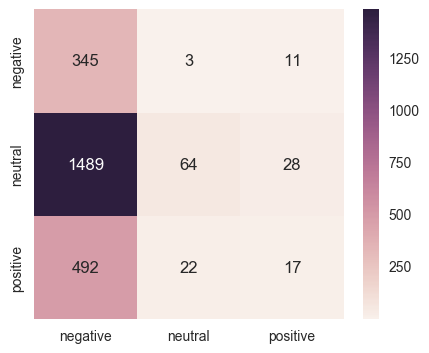

In [10]:
print "\nConfusion matrix for test data"
print "------------------------------"

array = confusion_matrix(y_true, y_pred)
#0: positive, 1: neutral, 2: negative
df_cm = pd.DataFrame(array, index = ['negative','neutral','positive'],
                  columns = ['negative','neutral','positive'])
plt.figure(figsize = (5,4))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.savefig("confusion_rnn.png")

In [15]:
from sklearn.metrics import classification_report
print "\nClassification Report"
print "---------------------"
print classification_report(y_true, y_pred)



Classification Report
---------------------
             precision    recall  f1-score   support

   negative       0.15      0.96      0.26       359
    neutral       0.72      0.04      0.08      1581
   positive       0.30      0.03      0.06       531

avg / total       0.55      0.17      0.10      2471

